# 第2日の課題

Scikit learn の GaussianNBとLogisticRegression でglassデータを識別します。

scipyのバージョンが1.3.0の場合は、loadarffでエラーがでます。ここでは、scipyのバージョンを1.1.0に落として実行します。scipyの変更後、ランタイムの再起動が必要です。

In [3]:
!pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 90.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0


## 準備

必要なライブラリ等を読み込みます。

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

## データの読み込み

arff形式のデータを読み込み、@data以下の情報を変数dataに、@attributeの情報を変数metaに格納します。Wekaがインストールされたフォルダのdataフォルダにあるglass.arffをランタイムにアップロードして実行します。このファイルはランタイムがリセットされると消えてしまいます。ファイルを残す場合はGoogle Driveに置いて、Colabの実行時にGoogle Driveをマウントするようにしてください。

In [0]:
(data, meta) = arff.loadarff('glass.arff')

dataはタプルを要素とする1次元arrayです。1つのタプルは9つの浮動小数点数（特徴ベクトル）と、1つの文字列（正解クラス）から構成されます。  

このデータをscikit-learnの学習データに変換するには、まずX（パターン行列）とy（正解クラスのベクトル）の型をnp.emptyを使って宣言します。それから、forループを使って、dataの各要素をlistに変換し、そのlistの最初の9つの要素を特徴ベクトルXに、最後の文字列をyに追加します。

In [0]:
X = np.empty((0,9), np.float)
y = np.empty((0,1), np.str)
for e in data:
    e2 = list(e)
    X = np.append(X, [e2[0:9]], axis=0)
    y = np.append(y, e2[9:10])

## データの可視化

PCAのインスタンスを作成し、fitメソッドで2次元に変換します。そして、explained_variance\_ratio\_ 属性の値で寄与率を確認します。

In [4]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [5]:
print(pca.explained_variance_ratio_) 

[0.47620525 0.26319276]


fit_transformメソッドで2次元に変換したデータをX2に格納します。グラフ表示は、set(y)でクラスラベル集合を作成し、forループを各要素をインデックスとして回してplotします。

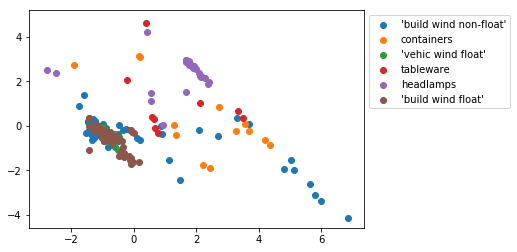

In [6]:
X2 = pca.fit_transform(X)
for t in set(y):
    plt.scatter(X2[y==t,0], X2[y==t,1], label=t)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

## ナイーブベイズ

識別器のインスタンスを作成し、fitメソッドで動作を確認します。次に、交差確認法で性能を評価します。
交差数の設定に気をつけてください。

In [7]:
clf1 = GaussianNB()
clf1.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [8]:
scores = cross_val_score(clf1, X, y, cv=9)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 100))

44.11 +/- 10.69 %


### 学習結果の表示

平均(theta)と分散(sigma)を表示します。

In [9]:
clf1.theta_

array([[1.51871829e+00, 1.32422857e+01, 3.55242857e+00, 1.16385714e+00,
        7.26191429e+01, 4.47428571e-01, 8.79728571e+00, 1.27142857e-02,
        5.70000000e-02],
       [1.51861855e+00, 1.31117105e+01, 3.00210526e+00, 1.40815789e+00,
        7.25980263e+01, 5.21052632e-01, 9.07368421e+00, 5.02631579e-02,
        7.97368421e-02],
       [1.51796353e+00, 1.34370588e+01, 3.54352941e+00, 1.20117647e+00,
        7.24047059e+01, 4.06470588e-01, 8.78294118e+00, 8.82352941e-03,
        5.70588235e-02],
       [1.51892769e+00, 1.28276923e+01, 7.73846154e-01, 2.03384615e+00,
        7.23661538e+01, 1.47000000e+00, 1.01238462e+01, 1.87692308e-01,
        6.07692308e-02],
       [1.51711621e+00, 1.44420690e+01, 5.38275862e-01, 2.12275862e+00,
        7.29658621e+01, 3.25172414e-01, 8.49137931e+00, 1.04000000e+00,
        1.34482759e-02],
       [1.51745556e+00, 1.46466667e+01, 1.30555556e+00, 1.36666667e+00,
        7.32066667e+01, 0.00000000e+00, 9.35666667e+00, 0.00000000e+00,
        0.0

In [10]:
clf1.sigma_

array([[5.07284502e-06, 2.45740492e-01, 6.01583898e-02, 7.35494102e-02,
        3.19679267e-01, 4.55133898e-02, 3.25682635e-01, 6.92834901e-03,
        7.82100207e-03],
       [1.42680227e-05, 4.35303655e-01, 1.45838768e+00, 1.00007135e-01,
        5.18097422e-01, 4.50778414e-02, 3.64409432e+00, 1.29563091e-01,
        1.11788802e-02],
       [3.45848189e-06, 2.41820763e-01, 2.49404865e-02, 1.13645677e-01,
        2.46989621e-01, 4.97404865e-02, 1.35985469e-01, 1.24567681e-03,
        1.09501751e-02],
       [1.03325963e-05, 5.57340830e-01, 9.21500594e-01, 4.44485209e-01,
        1.51785444e+00, 4.22216923e+00, 4.40210059e+00, 3.41510061e-01,
        2.23455642e-02],
       [6.25608747e-06, 4.54843997e-01, 1.20613841e+00, 1.89247564e-01,
        8.53555293e-01, 4.31473248e-01, 9.15032582e-01, 4.27413795e-01,
        8.57076982e-04],
       [8.63149551e-06, 1.04453334e+00, 1.06995803e+00, 2.90688891e-01,
        1.03577778e+00, 2.07081824e-09, 1.86875556e+00, 2.07081824e-09,
        2.0

### ロジスティック識別

識別器のインスタンスを作成し、fitメソッドで動作を確認します。次に、交差確認法で性能を評価します。

注1) FutureWarningはscikit-learnの先のバージョンでこのような変更をするので、将来このコードの動作が変わるあるいは動かない可能性があるという警告です。実行上、特に問題はありませんが、このような変更は最新の知見をもとに行われることが多いので、変更内容を調べておくと勉強になることがあります。
注2) ConvergenceWarningは繰り返し式の最適化アルゴリズムを実行したところ、値が収束する前に繰り返し最大回数の制限によって終わってしまったということです。この場合は、繰り返し最大回数を大きく設定します。

In [11]:
clf2 = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter=10000)
clf2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
scores = cross_val_score(clf2, X, y, cv=9)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 100))

62.21 +/- 9.36 %


### 学習結果の表示

重み(coef)と切片(intercept)を表示します。

In [13]:
clf2.coef_

array([[-2.98990549e-02, -7.43807122e-01,  1.54361406e+00,
        -2.02775657e+00,  8.94705239e-02, -1.73305012e-01,
         3.51881774e-01,  1.78987071e-01, -3.10596790e-01],
       [ 6.18465917e-02, -3.78069021e-01,  4.42141928e-01,
         3.25059154e-01,  1.83496688e-02,  6.14530202e-01,
         3.87394751e-01,  2.67642606e-01,  7.75361621e-01],
       [ 1.01376005e-03,  1.80718407e-01,  1.14259852e+00,
        -7.41949314e-01, -1.00151456e-01, -3.39094847e-01,
         3.27280224e-01, -1.33225630e-01,  9.95289601e-03],
       [ 2.34067138e-02, -6.80096927e-01, -7.99716387e-01,
         1.96841738e+00,  7.66707369e-02,  1.01685423e+00,
         1.70119095e-01, -1.58240306e-01, -9.32203464e-02],
       [-2.90794124e-03,  4.42753720e-01, -1.55649329e+00,
         6.45958884e-01,  5.25319686e-02,  3.11748183e-01,
        -8.45950662e-01,  9.40085077e-01, -1.40825046e-01],
       [-5.34600694e-02,  1.17850094e+00, -7.72144822e-01,
        -1.69729531e-01, -1.36871442e-01, -1.430732

In [14]:
clf2.intercept_

array([-0.05826766,  0.08977766,  0.02149716,  0.04298807, -0.01622578,
       -0.07976945])

### この演習問題で得られた知見

glassデータのようにクラス毎のデータが複雑に入り組んでいるような場合は、識別モデルの方が高い性能を示すことが多いようです。